In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import sympy 
from sympy import banded, ones, Matrix, symbols, sqrt, print_latex, oo
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import wofz 

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

## Symmetrically Weighted Hermite Linear Response Function

In [4]:
Nv = 6

In [5]:
# symbolic variables
xi = symbols('xi') 
k = symbols('k', integer = True)

In [6]:
vec = sympy.zeros(Nv)
vec_int = sympy.zeros(Nv)
vec_int[0] = 1 
for jj in range(1, Nv+1):
    vec[jj-1] = sympy.sqrt(jj)/ 2
    vec_int[jj] = (sympy.sqrt(jj-1)/sympy.sqrt(jj))*vec_int[jj-2]

In [7]:
vec[0, :]

Matrix([[1/2, sqrt(2)/2, sqrt(3)/2, 1, sqrt(5)/2, sqrt(6)/2]])

In [8]:
vec_int[0, :]

Matrix([[1, 0, sqrt(2)/2, 0, sqrt(6)/4, 0]])

In [9]:
A = banded({1: tuple(vec[0, :-1]), -1: tuple(vec[0, :-1])})

In [10]:
A

Matrix([
[  0,       1/2,         0,         0,         0,         0],
[1/2,         0, sqrt(2)/2,         0,         0,         0],
[  0, sqrt(2)/2,         0, sqrt(3)/2,         0,         0],
[  0,         0, sqrt(3)/2,         0,         1,         0],
[  0,         0,         0,         1,         0, sqrt(5)/2],
[  0,         0,         0,         0, sqrt(5)/2,         0]])

In [11]:
# idenitity matrix
I = np.eye(Nv, dtype=int)

In [13]:
# matrix inversion
M = sympy.Matrix(I*xi - k/np.abs(k) * A)

In [14]:
R_approx = sympy.simplify((vec_int[0, :]).dot(sympy.simplify(sympy.simplify(M.inv()[:, 1]/2)))  * k / np.abs(k))

In [15]:
R_approx

(32*xi**4 - 72*xi**2 + 15)/(64*xi**6 - 240*xi**4 + 180*xi**2 - 15)

In [16]:
print_latex(R_approx)

\frac{32 \xi^{4} - 72 \xi^{2} + 15}{64 \xi^{6} - 240 \xi^{4} + 180 \xi^{2} - 15}


## Asymptotic Expansion

### Adiabatic limit $\xi \to 0$

In [17]:
asymptotics_0 = R_approx.series(xi, 0, 6)

In [18]:
asymptotics_0

-1 - 36*xi**2/5 - 1088*xi**4/15 + O(xi**6)

In [19]:
print_latex(asymptotics_0)

-1 - \frac{36 \xi^{2}}{5} - \frac{1088 \xi^{4}}{15} + O\left(\xi^{6}\right)


### Fluid (cold plasma) limit $\xi \to \infty$

In [20]:
asymptotics_inf = R_approx.series(xi, oo, 7)

In [21]:
asymptotics_inf

105/(64*xi**6) + 3/(4*xi**4) + 1/(2*xi**2) + O(xi**(-7), (xi, oo))

In [22]:
print_latex(asymptotics_inf)

\frac{105}{64 \xi^{6}} + \frac{3}{4 \xi^{4}} + \frac{1}{2 \xi^{2}} + O\left(\frac{1}{\xi^{7}}; \xi\rightarrow \infty\right)


# Kinetic response function 

In [23]:
def Z_fun(z):
    return 1j*np.sqrt(np.pi)*wofz(z)

def R(xi):
    return -(1 + xi*Z_fun(xi))

def RHP3(xi):
    return (1j*xi -2/np.sqrt(np.pi))/(2/np.sqrt(np.pi) - 1j*3*xi - (4/np.sqrt(np.pi))*(xi**2) + 2j*(xi**3))

def RHP4(xi):
    return (-4 +2j*np.sqrt(np.pi)*xi + (3*np.pi -8)*(xi**2))/(4 - 6j*np.sqrt(np.pi)*xi - (9*np.pi -16)*(xi**2) + 4j*np.sqrt(np.pi)* (xi**3) + 2*(3*np.pi - 8)*(xi**4))

def R3(xi):
    return 2/(4*xi**2 - 3)

def R4(xi):
    return (8*(xi**2) - 3)/(16*(xi**4) - 24*(xi**2) + 3)

def R5(xi):
    return (8*(xi**2 - 1))/(16*(xi**4) - 40*(xi**2) + 15)

def R6(xi):
    return (32*(xi**4) - 72*(xi**2) + 15)/(64*(xi**6) - 240*(xi**4) + 180*(xi**2) - 15)

In [24]:
xi = 10**np.linspace(-2, 2, int(1e5))

In [25]:
R_HP3 = RHP3(xi)
R_HP4 = RHP4(xi)
R_3 = R3(xi)
R_4 = R4(xi)
R_5 = R5(xi)
R_6 = R6(xi)
R_true = R(xi)

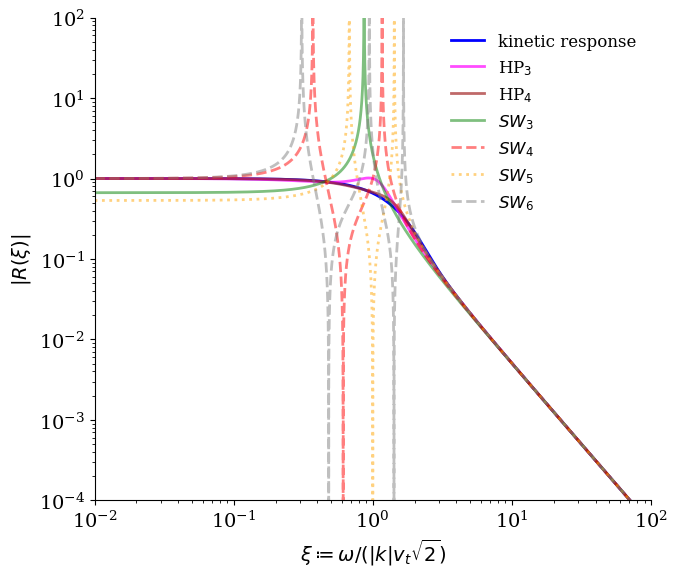

In [26]:
fig, ax = plt.subplots(figsize=(7, 6))

ax.plot(xi, np.abs(R_true), label=r"kinetic response", c="blue", linewidth=2)
ax.plot(xi, np.abs(R_HP3), label=r"HP$_{3}$", c="magenta", linewidth=2, alpha=0.7)
ax.plot(xi, np.abs(R_HP4), label=r"HP$_{4}$", c="brown", linewidth=2, alpha=0.7)
ax.plot(xi, np.abs(R_3), label=r"$SW_{3}$", c="green", ls="-", linewidth=2, alpha=0.5)
ax.plot(xi, np.abs(R_4), label=r"$SW_{4}$", c="red", ls="--", linewidth=2, alpha=0.5)
ax.plot(xi, np.abs(R_5), label=r"$SW_{5}$", c="orange", ls=":", linewidth=2, alpha=0.5)
ax.plot(xi, np.abs(R_6), label=r"$SW_{6}$", c="grey", ls="--", linewidth=2, alpha=0.5)

ax.set_ylim(10**-4, 10**2)
ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$|R(\xi)|$")
ax.set_xlabel(r"$\xi \coloneq \omega/(|k|v_{t} \sqrt{2})$")
ax.set_xscale("log")
ax.set_xlim(1e-2, 1e2)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("figs/symbolic_response_function_SW.png", dpi=300)

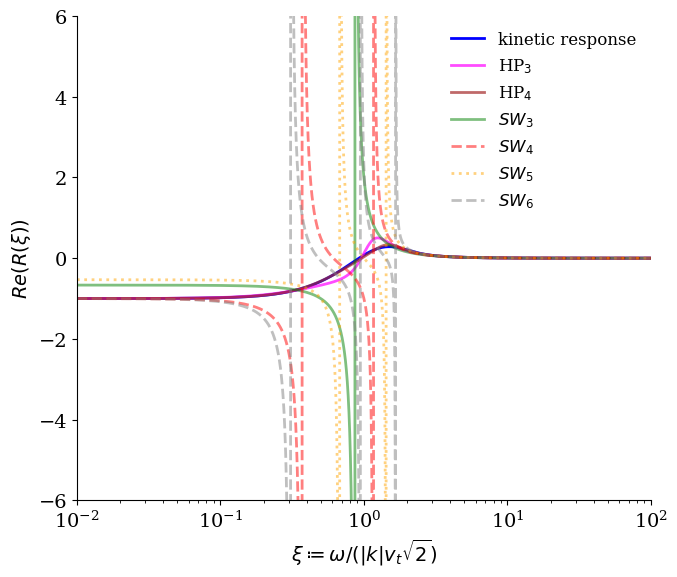

In [27]:
fig, ax = plt.subplots(figsize=(7, 6))

ax.plot(xi, np.real(R_true), label=r"kinetic response", c="blue", linewidth=2)
ax.plot(xi, np.real(R_HP3), label=r"HP$_{3}$", c="magenta", linewidth=2, alpha=0.7)
ax.plot(xi, np.real(R_HP4), label=r"HP$_{4}$", c="brown", linewidth=2, alpha=0.7)
ax.plot(xi, np.real(R_3), label=r"$SW_{3}$", c="green", ls="-", linewidth=2, alpha=0.5)
ax.plot(xi, np.real(R_4), label=r"$SW_{4}$", c="red", ls="--", linewidth=2, alpha=0.5)
ax.plot(xi, np.real(R_5), label=r"$SW_{5}$", c="orange", ls=":", linewidth=2, alpha=0.5)
ax.plot(xi, np.real(R_6), label=r"$SW_{6}$", c="grey", ls="--", linewidth=2, alpha=0.5)

ax.set_ylim(-6, 6)
#ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$Re(R(\xi))$")
ax.set_xlabel(r"$\xi \coloneq \omega/(|k|v_{t} \sqrt{2})$")
ax.set_xscale("log")
ax.set_xlim(1e-2, 1e2)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("figs/symbolic_response_function_real_SW.png", dpi=300)